<a href="https://colab.research.google.com/github/alex-punchenko/PyDa_Diplom_work/blob/main/Decision_Tree_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Regression

# Data Acquisition and Importing Initial Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import fetch_california_housing

In [22]:
print(fetch_california_housing().DESCR) #info california_housing data set

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [23]:
df = fetch_california_housing(as_frame=True).frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df.shape

(20640, 9)

# Missing Value Detection and Handling

In [25]:
df.isna().agg(['mean', 'sum']).T

,mean,sum
MedInc,0.0,0.0
HouseAge,0.0,0.0
AveRooms,0.0,0.0
AveBedrms,0.0,0.0
Population,0.0,0.0
AveOccup,0.0,0.0
Latitude,0.0,0.0
Longitude,0.0,0.0
MedHouseVal,0.0,0.0


No Missing Values Found

# Splitting the Dataset into Training and Testing Subsets in an 80/20 Ratio

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x =  df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)


# Data Normalization


I will normalize the data using Robust Scaler since I did not remove outliers.

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
scaler = RobustScaler()

In [31]:
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [32]:
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_val = pd.DataFrame(x_val_scaled, columns=x_val.columns, index=x_val.index)

In [33]:
x_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15961,-0.162423,1.210526,-0.140016,-0.370921,-0.304162,0.358599,0.912698,-1.036842
1771,0.029776,0.684211,-0.201213,-0.982710,-0.205977,0.462076,0.976190,-1.015789
16414,-0.422209,-0.684211,1.920304,6.621392,-1.220918,0.614120,0.962963,-0.723684


In [34]:
x_val.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,-0.135242,0.526316,-0.447083,0.267069,-0.058698,-1.224031,-0.052910,0.034211
2151,-0.719094,0.421053,-0.147072,-0.106991,-0.022412,-0.240812,0.666667,-0.339474
15927,0.215179,0.894737,-0.461243,-0.390951,0.394877,1.139772,0.917989,-1.034211


# Building a Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

## Score Linear Regression

In [38]:
model.score(x_val, y_val)

0.5965968374812354

# Building a Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [40]:
dt_model = DecisionTreeRegressor(random_state=1)

In [41]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [42]:
dt_model.get_depth()

37

In [43]:
dt_model.score(x_val, y_val)

0.617411747588577

## Tree Visualization

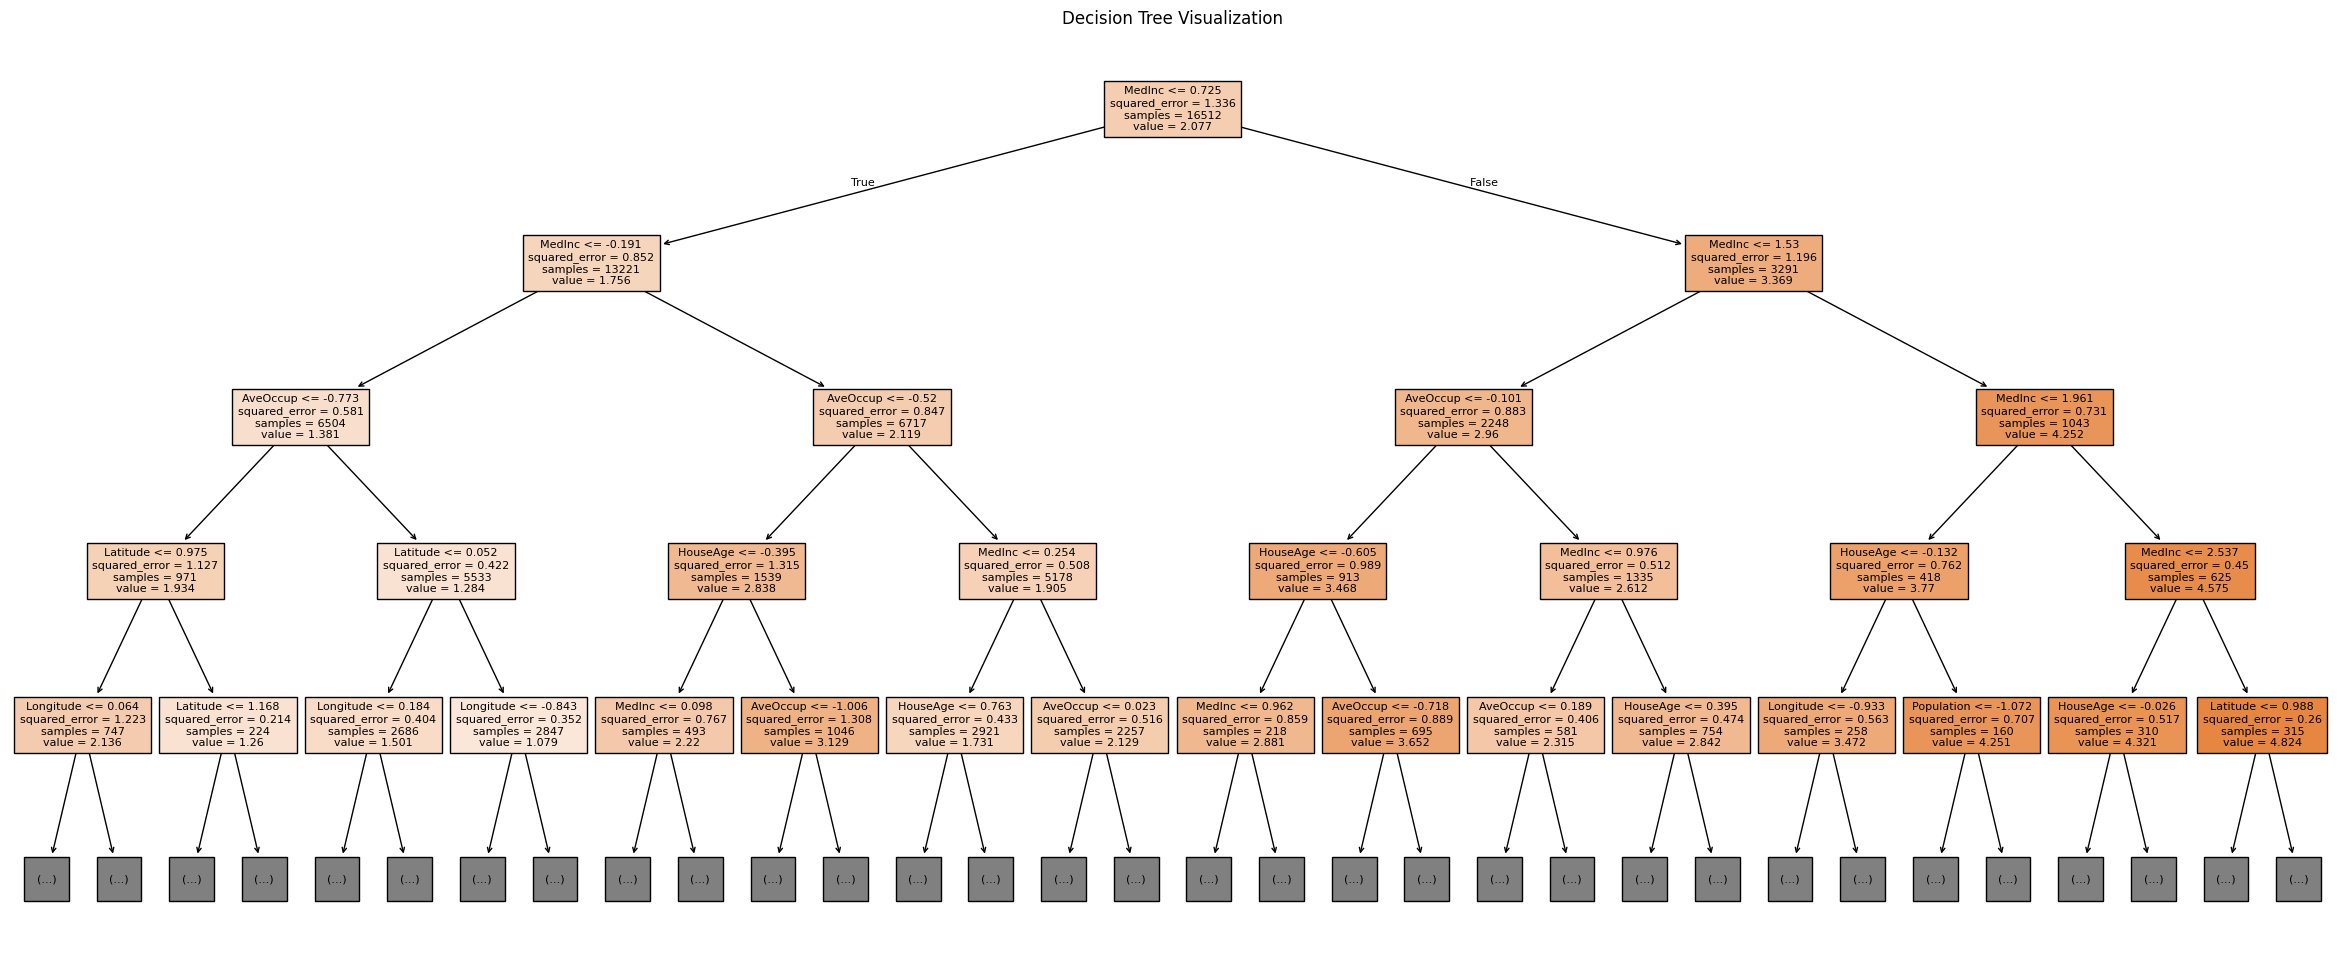

In [44]:
plt.figure(figsize=(30, 12))
plot_tree(dt_model,
          feature_names=x.columns,
          filled=True,
          fontsize=8,
          max_depth=4)

plt.title("Decision Tree Visualization")
plt.show()

## Optimizing Tree Depth

### Optimizing max depth

In [45]:
results = {}

for i in range(1, 39):
    dt_model = DecisionTreeRegressor(max_depth=i, random_state=1)
    dt_model.fit(x_train, y_train)
    score = dt_model.score(x_val, y_val)
    results[i] = score


best_depth = max(results, key=results.get)
best_score = results[best_depth]

print(f"Best depth: {best_depth}, Best score: {best_score}")

Best depth: 8, Best score: 0.7096106510567972


### Optimizing min samples leaf

In [46]:
results = {}

for i in range(1, 39):
    dt_model = DecisionTreeRegressor(min_samples_leaf=i, random_state=1)
    dt_model.fit(x_train, y_train)
    score = dt_model.score(x_val, y_val)
    results[i] = score


best_min_samples_leaf = max(results, key=results.get)
best_score = results[best_depth]

print(f"Best min_samples_leaf: {best_depth}, Best score: {best_score}")

Best min_samples_leaf: 8, Best score: 0.7186270311112258


## Final Result Using the Best Parameters

In [47]:
dt_model = DecisionTreeRegressor(max_depth = 8,min_samples_leaf = 8, random_state=1)
dt_model.fit(x_train, y_train)
score = dt_model.score(x_val, y_val)
score

0.7130294975209823


# Conclusions
Using linear regression and decision tree models, the decision tree demonstrated the best performance.

In this case, it is better to use DecisionTreeRegressor. However, this approach may not always work.

If the relationship between features and the target variable is linear or nearly linear, choose linear regression.
If the relationship is complex, nonlinear, or if there are outliers, a decision tree is more suitable.